# Introduction

### About Columns :

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI)

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import Libraries

In [56]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

from scipy.stats import pearsonr

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

from imblearn.under_sampling import NearMiss

from tensorflow.keras.optimizers.legacy import Adam
from tensorflow import keras
from keras import layers
from tensorflow import nn

from tqdm import tqdm


# Data Exploring

In [57]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

### Dataset Report

In [58]:
data.shape

(253680, 22)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [60]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [61]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# EDA

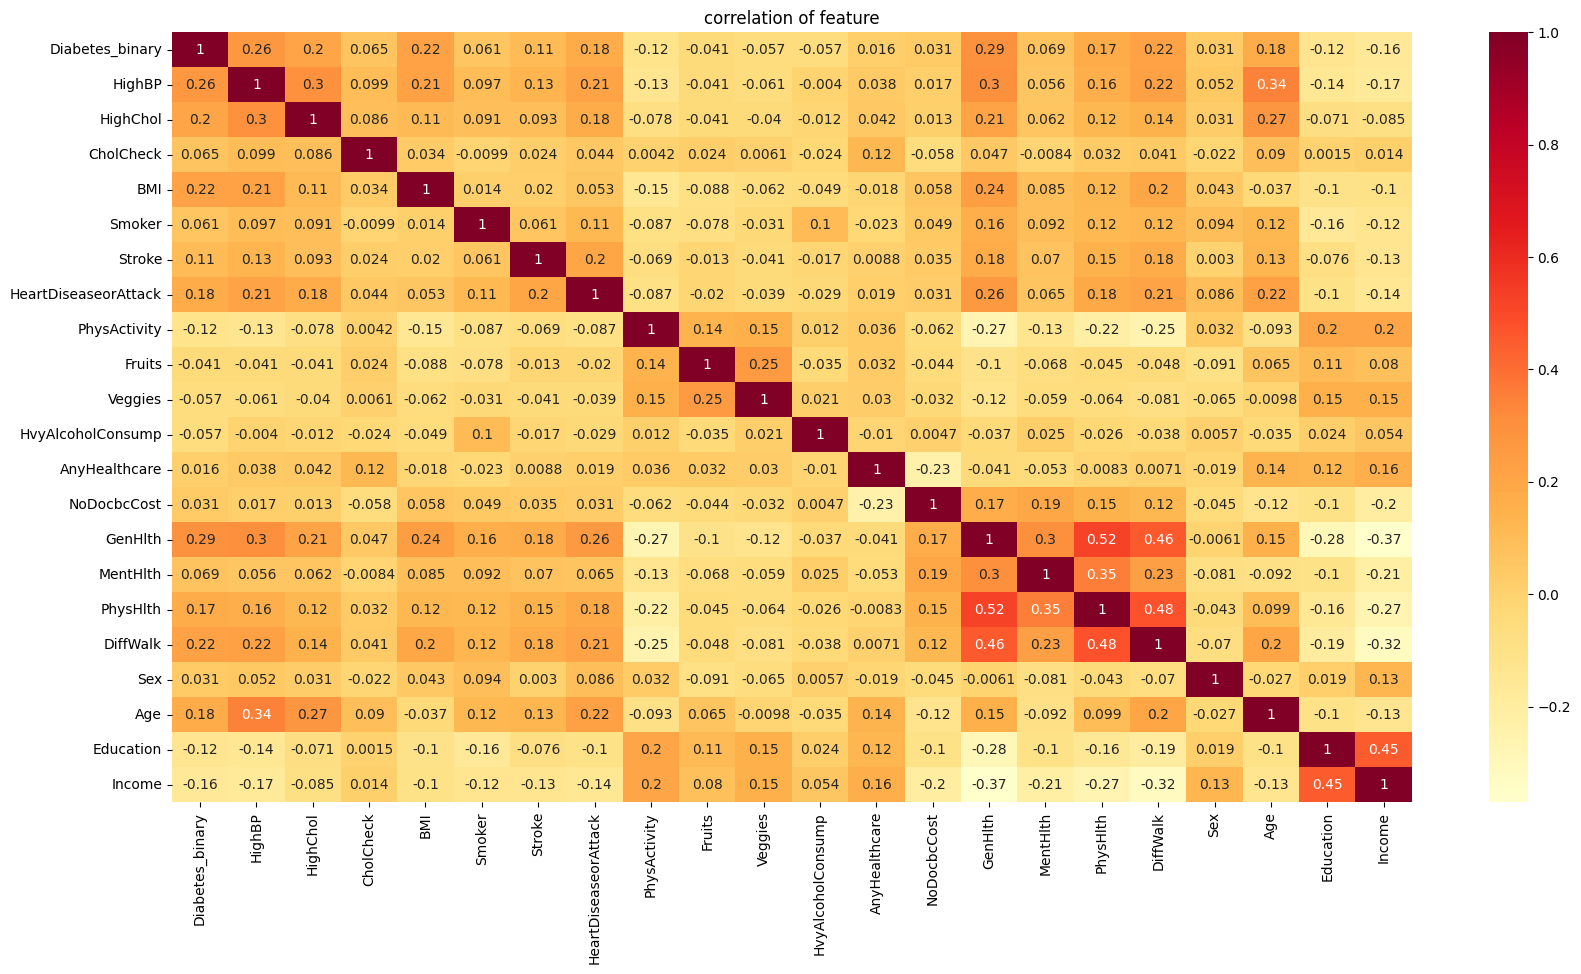

In [62]:

plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()


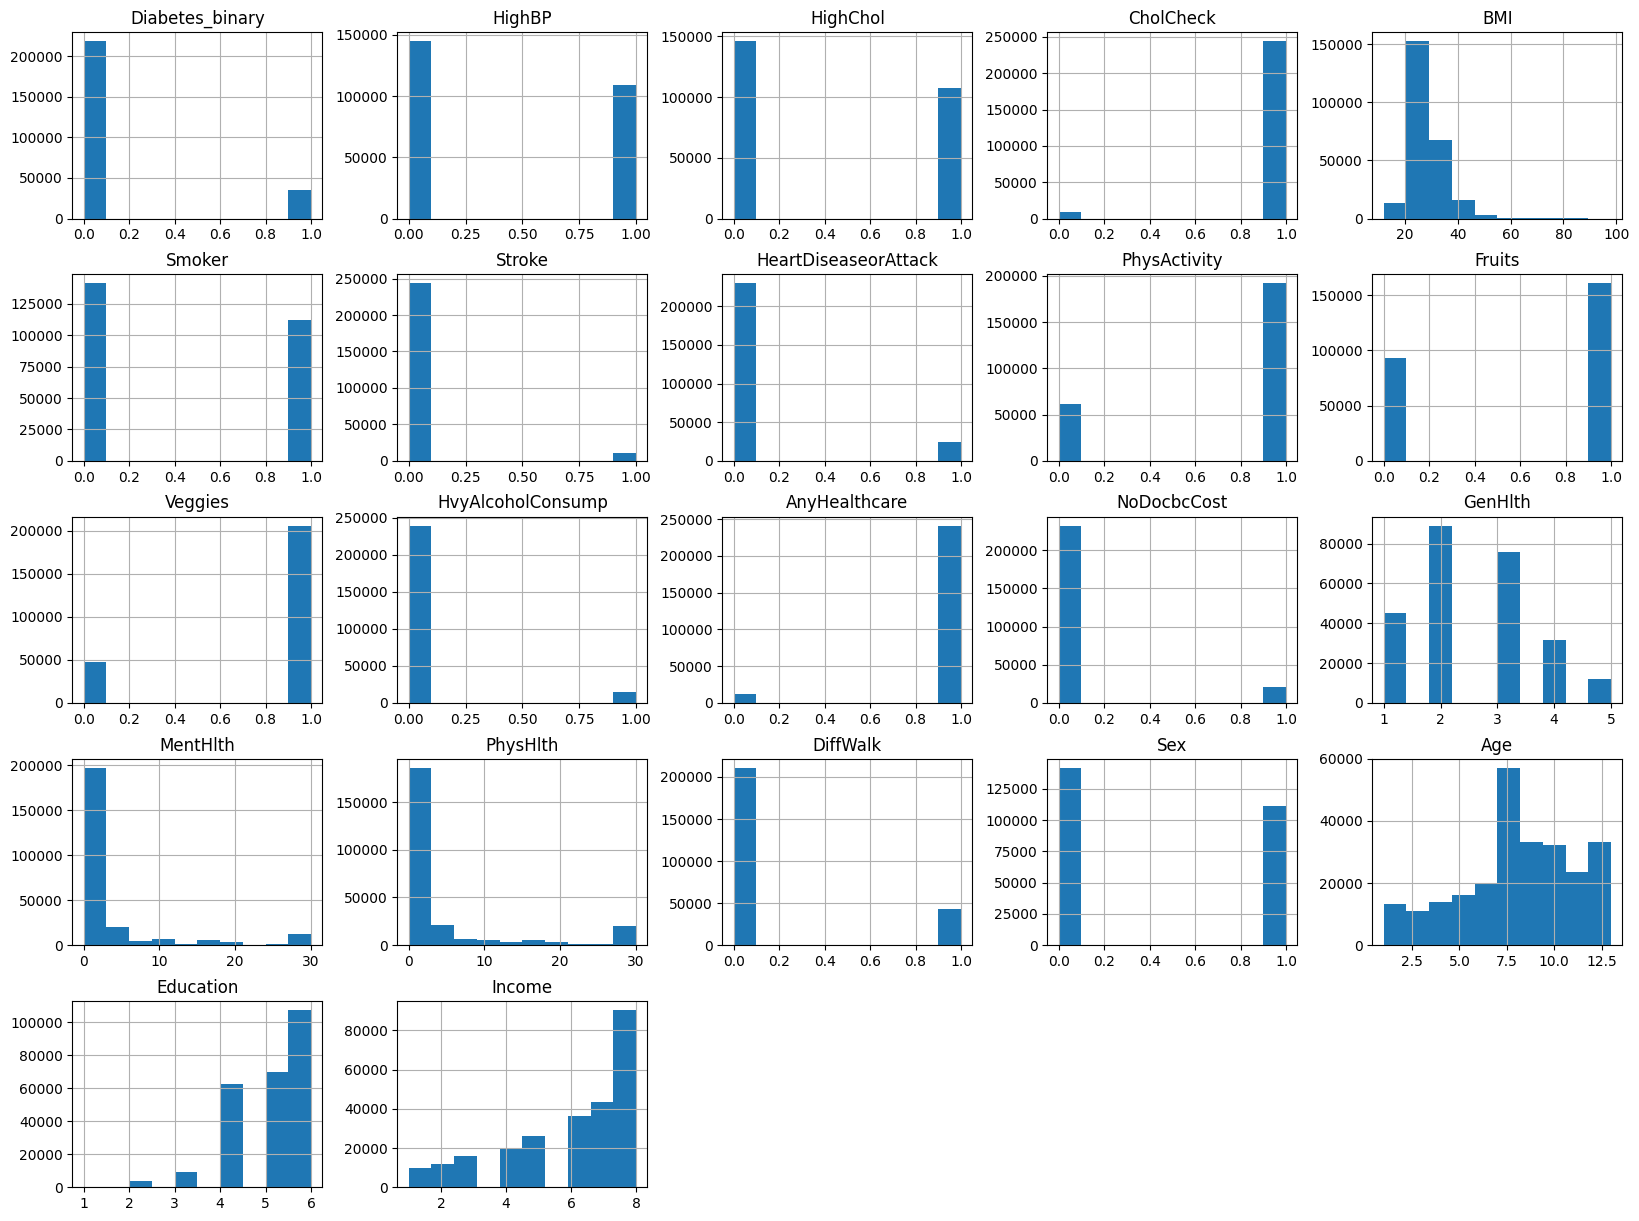

In [63]:
data.hist(figsize=(20,15));

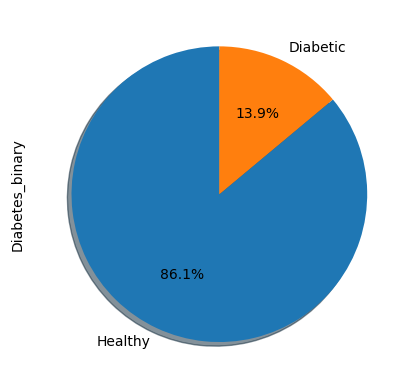

In [64]:
labels = 'Healthy','Diabetic'

data.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

# Preprocessing

### Dealing with imbalancing

In [65]:
df_features = data.drop("Diabetes_binary",axis=1)
df_target = data["Diabetes_binary"]

In [66]:
df_target.value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [67]:
nm = NearMiss(version = 1 , n_neighbors = 10)

df_features, df_target = nm.fit_resample(df_features, df_target)

In [68]:
df_features.shape , df_target.shape

((70692, 21), (70692,))

### Check and drop dublicated data

In [69]:
data.duplicated().sum()

24206

In [70]:
data.drop_duplicates(inplace = True)

In [71]:
data.duplicated().sum()

0

## Feature Selection

In [72]:
threshold = 10

### Mutual Information

In [73]:
from sklearn.feature_selection import mutual_info_classif
high_score_features_mic = []
feature_scores = mutual_info_classif(df_features, df_target, random_state=0)
for score, f_name in sorted(zip(feature_scores, df_features.columns), reverse=True)[:threshold]:
        high_score_features_mic.append(f_name)
        
print(high_score_features_mic)

['GenHlth', 'PhysHlth', 'Income', 'DiffWalk', 'MentHlth', 'BMI', 'Education', 'PhysActivity', 'HighBP', 'Veggies']


### Chi-Squared

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

skb = SelectKBest(score_func=chi2, k=threshold)
sel_skb = skb.fit(df_features, df_target)
sel_skb_index = sel_skb.get_support()
df_norm_skb = df_features.iloc[:, sel_skb_index]
high_score_features_skb = list(df_norm_skb.columns)
print(high_score_features_skb)


['HighBP', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Income']


### Pearson Correlation

In [75]:
pearson_list = []
for l in list(df_features.columns):
    p,_ = pearsonr(df_features[l], df_target)
    pearson_list.append(abs(p))
    
p_value=pd.Series(pearson_list,index=df_features.columns)
p_value.sort_values(ascending=False,inplace=True)
high_score_features_pearson = list(p_value.index[:threshold])
print(high_score_features_pearson)

['GenHlth', 'Income', 'DiffWalk', 'PhysHlth', 'Education', 'PhysActivity', 'BMI', 'MentHlth', 'HighBP', 'HeartDiseaseorAttack']


### Best of all

In [76]:
high_score_features = []
for h in  high_score_features_mic:
    if h in high_score_features_skb and h in high_score_features_pearson:
        high_score_features.append(h)

print(high_score_features)
# ['GenHlth', 'PhysHlth', 'Income', 'DiffWalk', 'MentHlth', 'BMI', 'HighBP']

['GenHlth', 'PhysHlth', 'Income', 'DiffWalk', 'MentHlth', 'BMI', 'HighBP']


# Data Splitting

In [77]:
X = df_features[high_score_features]
y = df_target

In [78]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)

# Data Scalling

In [79]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# Modeling

In [80]:
from sklearn.metrics import roc_auc_score

algos = [
        LogisticRegression(), 
        RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'),
        DecisionTreeClassifier(max_depth=5),
        KNeighborsClassifier(n_neighbors= 6),
        SVC(kernel='rbf', C=1.,probability=True)
       ]

names = ['Logistic Regression','Random Forest','Decision Tree','KNN','SVC']
roc_list = []
pred_list = []


In [81]:
for model in tqdm(algos):
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    
    pred_list.append(y_pred)
    
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

100%|██████████| 5/5 [01:50<00:00, 22.11s/it]


In [86]:
evaluation = pd.DataFrame({'Model': names,'AUC Score': roc_list})

In [87]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
evaluation

,Model,AUC Score
1,Random Forest,0.936473
0,Logistic Regression,0.932431
4,SVC,0.927453
3,KNN,0.912477
2,Decision Tree,0.911042


Logistic Regression
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87     10662
         1.0       0.90      0.81      0.85     10546

    accuracy                           0.86     21208
   macro avg       0.87      0.86      0.86     21208
weighted avg       0.87      0.86      0.86     21208



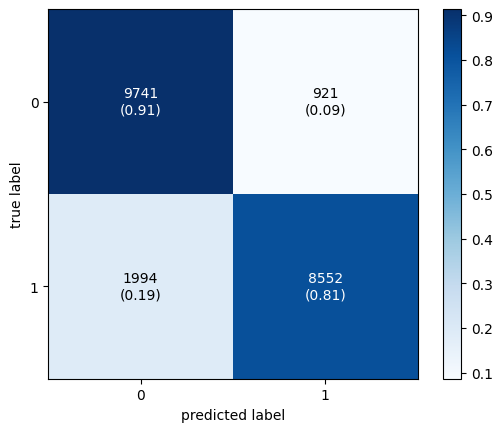

----------------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88     10662
         1.0       0.94      0.78      0.85     10546

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.86     21208
weighted avg       0.88      0.87      0.86     21208



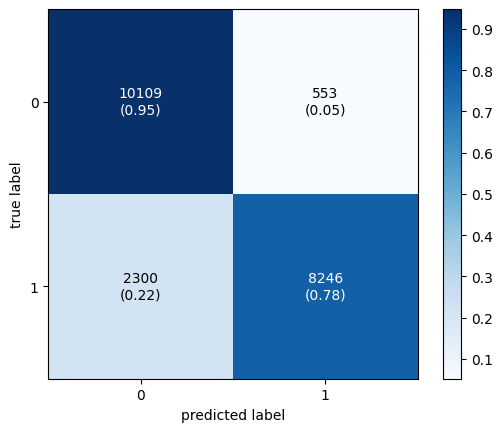

----------------------------------------------------------------------
Decision Tree
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86     10662
         1.0       0.95      0.72      0.82     10546

    accuracy                           0.85     21208
   macro avg       0.87      0.84      0.84     21208
weighted avg       0.87      0.85      0.84     21208



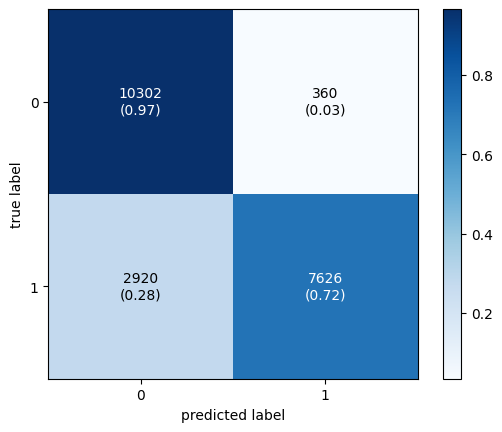

----------------------------------------------------------------------
KNN
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     10662
         1.0       0.84      0.84      0.84     10546

    accuracy                           0.84     21208
   macro avg       0.84      0.84      0.84     21208
weighted avg       0.84      0.84      0.84     21208



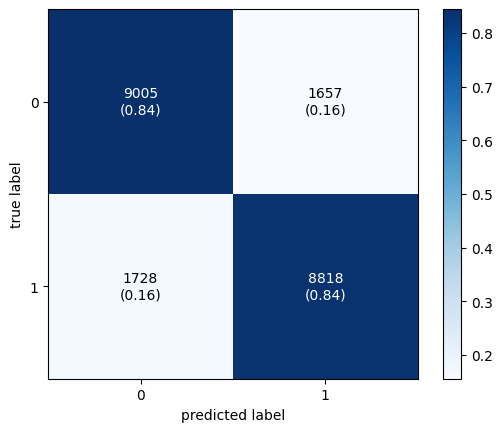

----------------------------------------------------------------------
SVC
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88     10662
         1.0       0.94      0.79      0.86     10546

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208



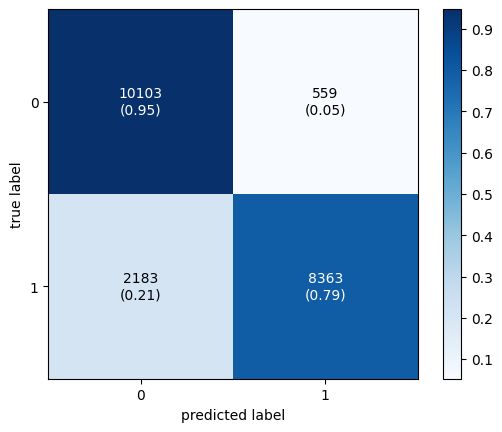

----------------------------------------------------------------------


In [88]:
for i in range(len(names)):  
    name = names[i]

    print(name)
    y_pred = [1.0 if y >= 0.5 else 0.0 for y in pred_list[i]]
    matrix = classification_report(y_test,y_pred)
    print(matrix)

    # calculating and plotting the confusion matrix
    cm1 = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

    print("----------------------------------------------------------------------")


# Summary

In [90]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
evaluation

,Model,AUC Score
1,Random Forest,0.936473
0,Logistic Regression,0.932431
4,SVC,0.927453
3,KNN,0.912477
2,Decision Tree,0.911042
